<a href="https://colab.research.google.com/github/KhumairahErnas/Khumairah-Awaliyah-Ernas_TugasMachineLearning/blob/main/Khumairah-TugasMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [7]:
data=("/content/drive/MyDrive/Khumairah Awaliyah Ernas TM9/dataset/DatasetMamikosMachineLearning.xlsx")
data=pd.read_excel(data)

In [8]:
data.head()

,nama,harga,rating,jenis,Kamar Mandi Dalam,Wifi,AC,Kloset Duduk,Kasur
0,Kost Apik Aisyah Kukusan Tipe A Beji Depok,1143000,NaN,Putri,KMD,NaN,AC,NaN,Kasur
1,Kost Apik UI Puspita Tipe A Kukusan Beji Depok,1323000,NaN,Putri,KMD,WiFi,AC,NaN,Kasur
2,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,NaN,Putri,KMD,WiFi,AC,KD,Kasur
3,Kost Apik Duta Residence Tipe A Sukmajaya Depok,1548000,NaN,Campur,KMD,WiFi,AC,KD,Kasur
4,Kost Apik UI Puspita Tipe B Kukusan Beji Depok,1233000,NaN,Putri,KMD,WiFi,AC,NaN,Kasur


In [9]:
data.tail()

,nama,harga,rating,jenis,Kamar Mandi Dalam,Wifi,AC,Kloset Duduk,Kasur
10995,Kost Va Tipe A1 Jagakarsa Jakarta Selatan,700000,NaN,Putra,NaN,WiFi,NaN,KD,Kasur
10996,Kost Pondok Katama Tipe B Beji Depok,900000,NaN,Putra,NaN,WiFi,NaN,NaN,Kasur
10997,Kost Wisma Violet Beji Depok,800000,NaN,Putri,KMD,WiFi,NaN,NaN,NaN
10998,Kost Eksklusif Mara Juara Tipe Large Bedroom B...,2499000,NaN,Campur,KMD,WiFi,AC,KD,Kasur
10999,Kost Giyan Exclusive Tipe Reguler Beji Depok,1100000,NaN,Campur,KMD,NaN,AC,KD,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nama               11000 non-null  object 
 1   harga              11000 non-null  int64  
 2   rating             2786 non-null   float64
 3   jenis              11000 non-null  object 
 4   Kamar Mandi Dalam  9976 non-null   object 
 5   Wifi               8118 non-null   object 
 6   AC                 5816 non-null   object 
 7   Kloset Duduk       7182 non-null   object 
 8   Kasur              10702 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 773.6+ KB


In [11]:
data.shape

(11000, 9)

In [12]:
# mencari data kosong
data.isnull().sum()

nama                    0
harga                   0
rating               8214
jenis                   0
Kamar Mandi Dalam    1024
Wifi                 2882
AC                   5184
Kloset Duduk         3818
Kasur                 298
dtype: int64

In [13]:
## mengisi nilai kosong dengan "0" pada data
data.fillna('0',axis=0,inplace=True)

In [14]:
# menampilkan tipe data
data.dtypes

nama                 object
harga                 int64
rating               object
jenis                object
Kamar Mandi Dalam    object
Wifi                 object
AC                   object
Kloset Duduk         object
Kasur                object
dtype: object

<Axes: >

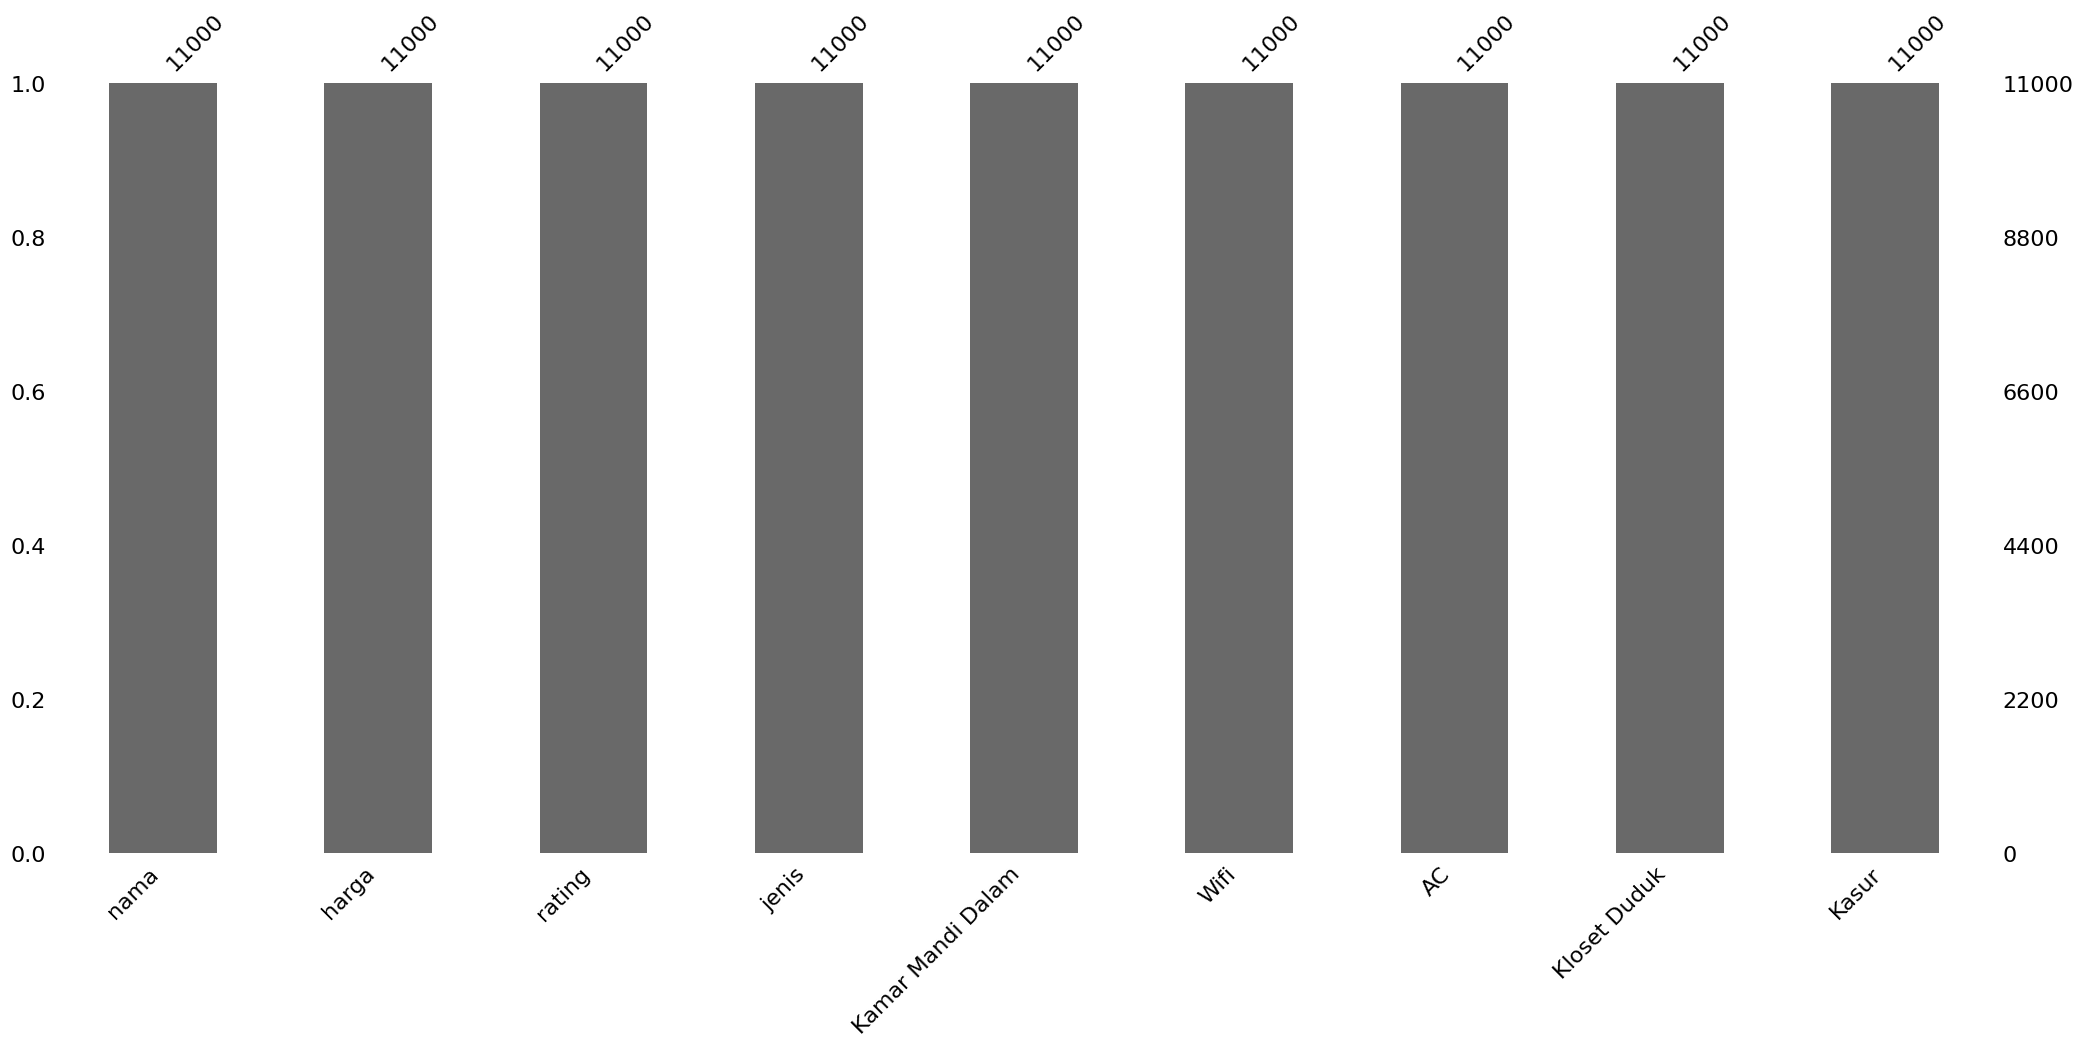

In [15]:
import missingno as msno
msno.bar(data)

In [17]:
# mencari data kosong
data.isnull().sum()

nama                 0
harga                0
rating               0
jenis                0
Kamar Mandi Dalam    0
Wifi                 0
AC                   0
Kloset Duduk         0
Kasur                0
dtype: int64

In [18]:
data.head(10)

,nama,harga,rating,jenis,Kamar Mandi Dalam,Wifi,AC,Kloset Duduk,Kasur
0,Kost Apik Aisyah Kukusan Tipe A Beji Depok,1143000,0,Putri,KMD,0,AC,0,Kasur
1,Kost Apik UI Puspita Tipe A Kukusan Beji Depok,1323000,0,Putri,KMD,WiFi,AC,0,Kasur
2,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,0,Putri,KMD,WiFi,AC,KD,Kasur
3,Kost Apik Duta Residence Tipe A Sukmajaya Depok,1548000,0,Campur,KMD,WiFi,AC,KD,Kasur
4,Kost Apik UI Puspita Tipe B Kukusan Beji Depok,1233000,0,Putri,KMD,WiFi,AC,0,Kasur
5,Kost Apik Duta Residence Tipe B Sukmajaya Depok,1008000,50.0,Campur,KMD,WiFi,0,0,Kasur
6,Kost Apik Griya Osfa UI Tipe A Beji Depok,1368000,0,Putri,KMD,WiFi,AC,0,Kasur
7,Kost Apik Wisma Okki Tipe B Beji Depok,1008000,47.0,Putri,KMD,WiFi,0,0,Kasur
8,Kost Singgahsini Alhidayah EMH-4 Tipe B Beji ...,1249500,0,Putri,KMD,WiFi,AC,0,Kasur
9,Kost Apik The Cozy Dorms Kukusan Beji Depok,1278000,0,Campur,KMD,0,AC,0,Kasur


In [19]:
# menampilkan tipe data
data.dtypes

nama                 object
harga                 int64
rating               object
jenis                object
Kamar Mandi Dalam    object
Wifi                 object
AC                   object
Kloset Duduk         object
Kasur                object
dtype: object

In [20]:
data.columns

Index(['nama', 'harga', 'rating', 'jenis', 'Kamar Mandi Dalam', 'Wifi', 'AC',
       'Kloset Duduk', 'Kasur'],
      dtype='object')

In [21]:
# mengubah nama kolom pada Dataset ke dalam bahasa Indonesia
data=data.rename(columns = {"Kamar Mandi Dalam": "Kamar_Mandi_Dalam", "Kloset Duduk": "Kloset_Duduk"})

In [22]:
data = data[data.duplicated()]
print(data.shape)

(9089, 9)


In [23]:
data.drop_duplicates()

,nama,harga,rating,jenis,Kamar_Mandi_Dalam,Wifi,AC,Kloset_Duduk,Kasur
20,Kost Apik Aisyah Kukusan Tipe A Beji Depok,1143000,0,Putri,KMD,0,AC,0,Kasur
21,Kost Apik UI Puspita Tipe A Kukusan Beji Depok,1323000,0,Putri,KMD,WiFi,AC,0,Kasur
22,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,0,Putri,KMD,WiFi,AC,KD,Kasur
25,Kost Apik Duta Residence Tipe B Sukmajaya Depok,1008000,50.0,Campur,KMD,WiFi,0,0,Kasur
27,Kost Apik Wisma Okki Tipe B Beji Depok,1008000,47.0,Putri,KMD,WiFi,0,0,Kasur
...,...,...,...,...,...,...,...,...,...
10930,Kost Samitra Tipe A Cimanggis Depok,1350000,0,Putra,KMD,WiFi,AC,0,Kasur
10932,Kost Rumah Samara Kelapa Dua Depok,1350000,50.0,Putra,KMD,WiFi,0,KD,Kasur
10955,Kost Kosisti Pondok Cina Beji Depok,700000,44.0,Putri,KMD,WiFi,0,0,Kasur
10967,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,50.0,Putri,KMD,WiFi,AC,KD,Kasur


In [24]:
data.shape

(9089, 9)

In [25]:
## menghapus kolom nama karena tidak dibutuhkan dalam pembuatan model.
data.drop('nama',axis=1,inplace=True)

In [27]:
## menghapus kolom rating karena tidak dibutuhkan dalam pembuatan model.
data.drop('rating',axis=1,inplace=True)

In [28]:
data.head()

,harga,jenis,Kamar_Mandi_Dalam,Wifi,AC,Kloset_Duduk,Kasur
20,1143000,Putri,KMD,0,AC,0,Kasur
21,1323000,Putri,KMD,WiFi,AC,0,Kasur
22,1683000,Putri,KMD,WiFi,AC,KD,Kasur
25,1008000,Campur,KMD,WiFi,0,0,Kasur
27,1008000,Putri,KMD,WiFi,0,0,Kasur


In [33]:
data.jenis.value_counts()

jenis
Putri     4425
Campur    2797
Putra     1867
Name: count, dtype: int64

In [34]:
data.Kamar_Mandi_Dalam.value_counts()

Kamar_Mandi_Dalam
KMD    8278
0       811
Name: count, dtype: int64

In [35]:
data.Wifi.value_counts()

Wifi
WiFi    6813
0       2276
Name: count, dtype: int64

In [36]:
data.AC.value_counts()

AC
AC    4952
0     4137
Name: count, dtype: int64

In [37]:
data.Kloset_Duduk.value_counts()

Kloset_Duduk
KD    6124
0     2965
Name: count, dtype: int64

In [38]:
data.Kasur.value_counts()

Kasur
Kasur    8851
0         238
Name: count, dtype: int64

In [39]:
#identifikasi Atribut
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9089 entries, 20 to 10999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   harga              9089 non-null   int64 
 1   jenis              9089 non-null   object
 2   Kamar_Mandi_Dalam  9089 non-null   object
 3   Wifi               9089 non-null   object
 4   AC                 9089 non-null   object
 5   Kloset_Duduk       9089 non-null   object
 6   Kasur              9089 non-null   object
dtypes: int64(1), object(6)
memory usage: 568.1+ KB


In [40]:
from pandas import DataFrame

In [43]:
from typing import List
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler

def preprocess_data(
    df: DataFrame,
    one_hot_cols: List[str],
    standardized_cols: List[str],
    scaler: StandardScaler,
) -> DataFrame:
    result_df = df.copy()
    result_df = encode_multivalued_attributes_with_one_hot_encoding(result_df, one_hot_cols)
    result_df, _ = standardize_attributes(result_df, standardized_cols, scaler)
    return result_df


In [44]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
one_hot_cols = (list(set(object_cols)))

In [45]:
object_cols = list(s[s].index)
object_cols

['jenis', 'Kamar_Mandi_Dalam', 'Wifi', 'AC', 'Kloset_Duduk', 'Kasur']

In [48]:
import pandas as pd
from pandas import DataFrame
from typing import List

# Fungsi one-hot encoding
def encode_multivalued_attributes_with_one_hot_encoding(
    df: DataFrame, col_names: List[str]
) -> DataFrame:
    result_df = df.copy()
    for col_name in col_names:
        one_hot_values_df = pd.get_dummies(result_df[col_name], prefix=col_name, drop_first=True)
        result_df = pd.concat([result_df, one_hot_values_df], axis=1)
        result_df = result_df.drop(col_name, axis=1)

    return result_df

In [51]:
one_hot_cols

['AC', 'jenis', 'Wifi', 'Kasur', 'Kloset_Duduk', 'Kamar_Mandi_Dalam']

In [52]:
data_preProcess=encode_multivalued_attributes_with_one_hot_encoding(data, one_hot_cols)

In [53]:
data_preProcess.head(5)

,harga,AC_AC,jenis_Putra,jenis_Putri,Wifi_WiFi,Kasur_Kasur,Kloset_Duduk_KD,Kamar_Mandi_Dalam_KMD
20,1143000,True,False,True,False,True,False,True
21,1323000,True,False,True,True,True,False,True
22,1683000,True,False,True,True,True,True,True
25,1008000,False,False,False,True,True,False,True
27,1008000,False,False,True,True,True,False,True


In [54]:
data_preProcess.tail(5)

,harga,AC_AC,jenis_Putra,jenis_Putri,Wifi_WiFi,Kasur_Kasur,Kloset_Duduk_KD,Kamar_Mandi_Dalam_KMD
10995,700000,False,True,False,True,True,True,False
10996,900000,False,True,False,True,True,False,False
10997,800000,False,False,True,True,False,False,True
10998,2499000,True,False,False,True,True,True,True
10999,1100000,True,False,False,False,False,True,True


In [55]:
data.harga.describe()

count    9.089000e+03
mean     1.271204e+06
std      5.163714e+05
min      3.500000e+05
25%      8.500000e+05
50%      1.233000e+06
75%      1.548000e+06
max      3.035000e+06
Name: harga, dtype: float64

In [56]:
import pandas as pd
from pandas import DataFrame
from typing import List

# normalisasi data numerik
def standardize_attributes(df: DataFrame, col_names: List[str], scaler: StandardScaler = None):
  result_df = df.copy()

  if not scaler:
    scaler = StandardScaler()
    scaler.fit(result_df[col_names])

  result_df[col_names] = scaler.transform(result_df[col_names])

  return result_df, scaler

In [58]:
numeric_cols=(list(set(data) - set(object_cols)))

In [59]:
numeric_cols

['harga']

In [60]:
standardized_cols = numeric_cols

In [61]:
standardized_cols

['harga']

In [62]:
data_preProcess=standardize_attributes(data_preProcess, standardized_cols)

In [63]:
data_preProcess

(          harga  AC_AC  jenis_Putra  jenis_Putri  Wifi_WiFi  Kasur_Kasur  \
 20    -0.248292   True        False         True      False         True   
 21     0.100314   True        False         True       True         True   
 22     0.797525   True        False         True       True         True   
 25    -0.509746  False        False        False       True         True   
 27    -0.509746  False        False         True       True         True   
 ...         ...    ...          ...          ...        ...          ...   
 10995 -1.106248  False         True        False       True         True   
 10996 -0.718909  False         True        False       True         True   
 10997 -0.912579  False        False         True       True        False   
 10998  2.377870   True        False        False       True         True   
 10999 -0.331570   True        False        False      False        False   
 
        Kloset_Duduk_KD  Kamar_Mandi_Dalam_KMD  
 20               False  

In [64]:
prep_data, new_scaler = standardize_attributes(data, standardized_cols)
new_scaler

StandardScaler()

In [65]:
prep_data = preprocess_data(data, one_hot_cols, standardized_cols, new_scaler)   # Hasil Preprocessing: prep_data
prep_data.shape

(9089, 8)

In [66]:
prep_data.head()

,harga,AC_AC,jenis_Putra,jenis_Putri,Wifi_WiFi,Kasur_Kasur,Kloset_Duduk_KD,Kamar_Mandi_Dalam_KMD
20,-0.248292,True,False,True,False,True,False,True
21,0.100314,True,False,True,True,True,False,True
22,0.797525,True,False,True,True,True,True,True
25,-0.509746,False,False,False,True,True,False,True
27,-0.509746,False,False,True,True,True,False,True


In [69]:
prep_data.describe()

,harga
count,9.089000e+03
mean,1.430623e-16
std,1.000055e+00
min,-1.784093e+00
25%,-8.157439e-01
50%,-7.398883e-02
75%,5.360708e-01
max,3.415940e+00


[]

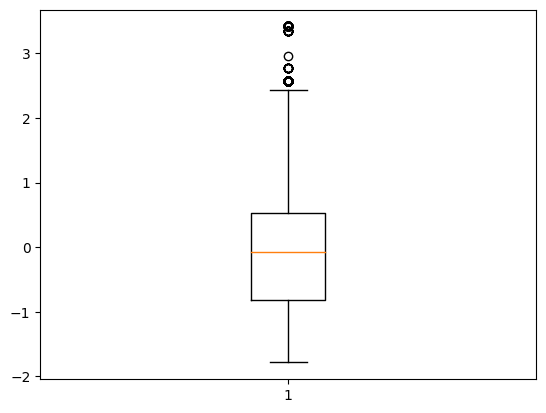

In [70]:
#boxplot with mathplotlib, melihat outlier yang dapat terjadi
plt.boxplot(prep_data.harga)
plt.plot()

In [71]:
# Handling with IQR
Q1 = (prep_data[['harga']]).quantile(0.25)
Q3 = (prep_data[['harga']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = prep_data['harga'] > maximum['harga']
lower_than = prep_data['harga'] < minimum['harga']
prep_data.loc[more_than, 'harga'] = maximum['harga']
prep_data.loc[lower_than, 'harga'] = minimum['harga']
print('\nPersebaran data setelah ditangani Outlier: ')
print(prep_data[['harga']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
harga    2.563793
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
harga   -2.843466
dtype: float64

Persebaran data setelah ditangani Outlier: 
             harga
count  9089.000000
mean     -0.010220
std       0.969182
min      -1.784093
25%      -0.815744
50%      -0.073989
75%       0.536071
max       2.563793


In [72]:
prep_data.shape

(9089, 8)

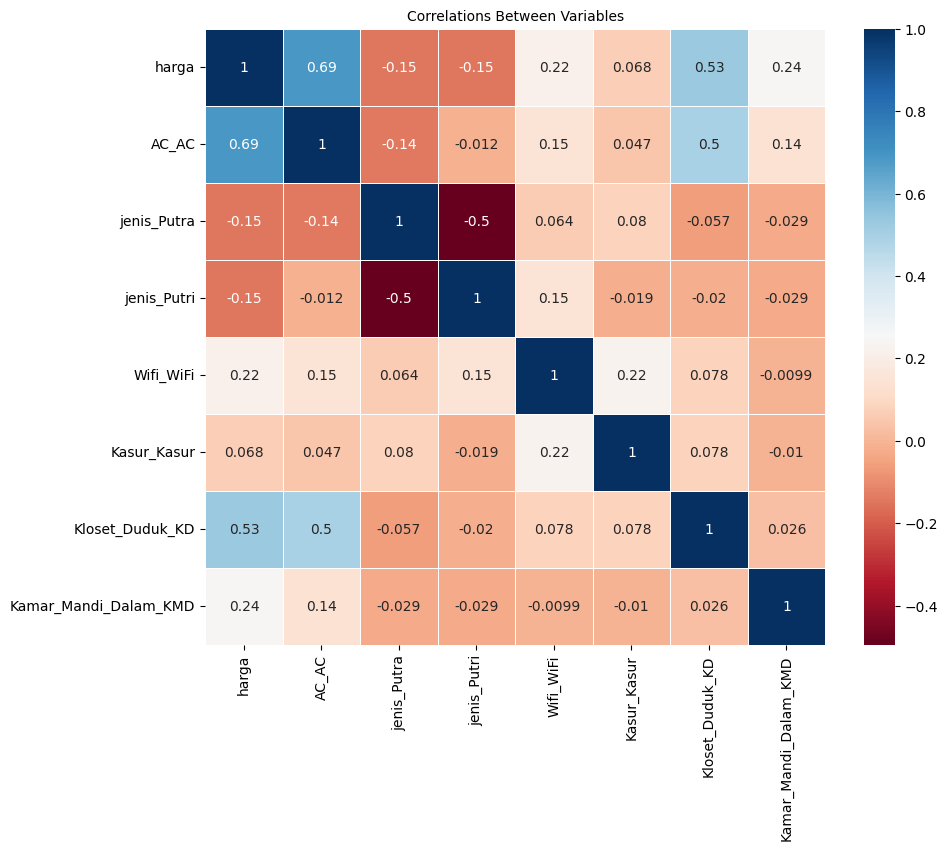

In [73]:
plt.figure (figsize=(10,8))
sns.heatmap(prep_data.corr(), annot=True, linewidth=.5, cmap= "RdBu")
plt.title("Correlations Between Variables", size=10)
plt.show()

In [76]:
numeric_cols = prep_data.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print ('The Most Correlated Features with Harga:'), print (corr['harga'].sort_values(ascending = False)[:10], '\n')
print ('The Most Uncorrelated Features with Harga:'), print (corr['harga'].sort_values(ascending = False)[-5:])

The Most Correlated Features with Harga:
harga    1.0
Name: harga, dtype: float64 

The Most Uncorrelated Features with Harga:
harga    1.0
Name: harga, dtype: float64


(None, None)

In [77]:
prep_data[['harga']].describe()

,harga
count,9089.000000
mean,-0.010220
std,0.969182
min,-1.784093
25%,-0.815744
50%,-0.073989
75%,0.536071
max,2.563793


In [78]:
#mengimplementasikan train/test
from sklearn.model_selection import train_test_split

In [79]:
X = prep_data.drop(['harga'], axis = 1)
y = prep_data['harga']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
# untuk mengatasi pengulangan proses hasil running yang berubah-ubah
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [82]:
print(X_train)

       AC_AC  jenis_Putra  jenis_Putri  Wifi_WiFi  Kasur_Kasur  Kloset_Duduk_KD  Kamar_Mandi_Dalam_KMD
10862   True        False        False       True         True            False                  False
1042   False        False         True      False        False            False                   True
6927    True         True        False       True         True             True                   True
9695   False        False         True       True         True            False                   True
7574    True         True        False       True         True             True                   True
...      ...          ...          ...        ...          ...              ...                    ...
3297   False        False        False       True         True            False                   True
10874   True        False         True       True         True             True                   True
7799    True        False        False       True         True           

In [83]:
print(X_test)

      AC_AC  jenis_Putra  jenis_Putri  Wifi_WiFi  Kasur_Kasur  Kloset_Duduk_KD  Kamar_Mandi_Dalam_KMD
2679   True        False        False      False         True             True                   True
4623   True        False         True       True         True             True                   True
2180  False        False        False      False         True             True                   True
9865  False        False         True       True         True            False                   True
9507   True        False         True       True         True             True                  False
...     ...          ...          ...        ...          ...              ...                    ...
8215   True        False         True       True         True             True                   True
7709   True        False         True       True         True             True                   True
9415  False        False        False      False        False            False    

In [84]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [85]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [89]:
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

,Metrics
MAE_li_reg,0.448707
MSE_li_reg,0.358609
RMSE_li_reg,0.598840


In [90]:
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.78967314 0.78076477 0.76723718 0.79043483 0.77016271]


In [91]:
r2_score(y_test, linear_reg_model.predict(X_test_scaled))

0.6187387911371014

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train);

In [94]:
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg],
    index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,0.400611
MSE_tree_reg,0.292727
RMSE_tree_reg,0.541043


In [99]:
scores = cross_val_score(tree_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.82289144 0.82348561 0.80689687 0.83132465 0.81310803]


In [102]:
r2_score(y_test, tree_reg_model.predict(X_test_scaled))

0.6887819191552271

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train);

In [136]:
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg],
    index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,0.401089
MSE_forest_reg,0.293227
RMSE_forest_reg,0.541505


In [137]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.82301719 0.82346446 0.80680882 0.83129728 0.81294784]


In [138]:
r2_score(y_test, forest_reg_model.predict(X_test_scaled))

0.6882506286088769